In [1]:
# Description
# Source : https://www.kaggle.com/mirichoi0218/insurance
# Dataset : Dataset is about the Individual Medical Costs billed by Health Insurance, in United States.


In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [3]:
# import
file = '..\Data1\insurance.csv'
df = pd.read_csv(file)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape   # There are 1338 rows with 7 columns. which is a average size.

(1338, 7)

In [5]:
df.info()   # There are no Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='region', ylabel='count'>

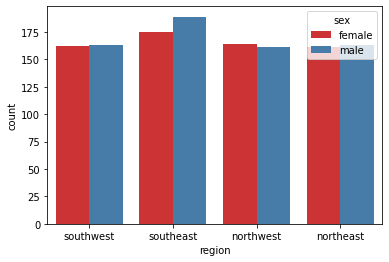

In [7]:
# EDA - Review Data
sns.countplot(x='region', hue='sex', data=df, palette="Set1")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Duistribution')

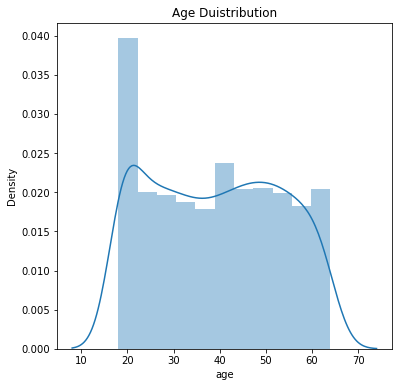

In [8]:
sns.set
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Duistribution')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

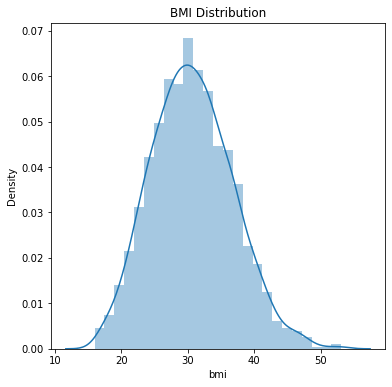

In [9]:
sns.set
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
# Normal BMI Range is 18.5 to 24.9. Greater than this value are Overweight.
# From the Distribution, it show most of the people is overweight

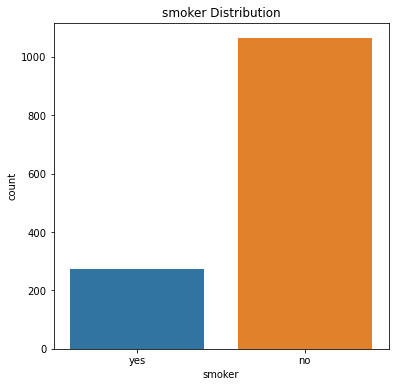

In [10]:
# Smokers
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker Distribution')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AGE Distribution')

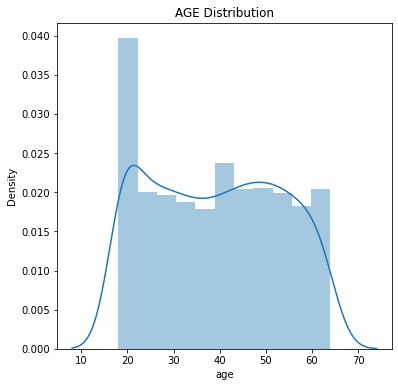

In [11]:
sns.set
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('AGE Distribution')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CHILDREN Distribution')

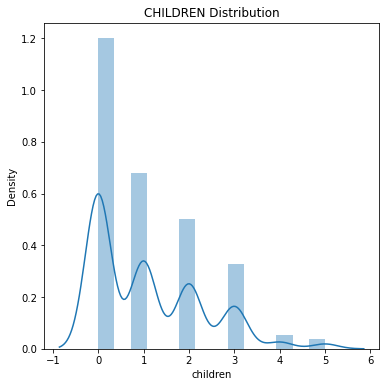

In [12]:
sns.set
plt.figure(figsize=(6,6))
sns.distplot(df['children'])
plt.title('CHILDREN Distribution')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CHARGES Distribution')

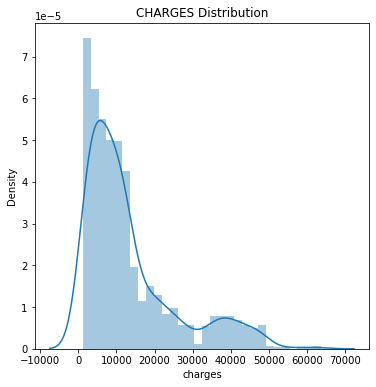

In [13]:
sns.set
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('CHARGES Distribution')

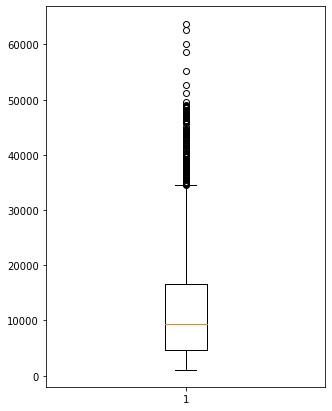

In [14]:
fig = plt.figure(figsize =(5, 7))
plt.boxplot(df.charges)
plt.show()

In [15]:
df[ (df.charges>50000) ] 

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [16]:
df = df[ (df.charges<50000) ] 

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
# Data preprocessing - Data Cleaning

# Encoding Categorical Features
# sex - descrete - male / female
# smoker - discrete - yes / no
# region - dsicrete - southwest / southeast / northwest / northeast

df.replace( {'sex': {'female':0, 'male':1}}, inplace=True )
df.replace( {'smoker': {'no':0, 'yes':1}}, inplace=True )
df.replace( {'region': {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace=True )
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [19]:
# Set X and y
X = df.drop(columns='charges', axis=1)
y = df['charges']

In [20]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
# Feature Removal
# adding the constant term
X1_train = sm.add_constant(X_train)
# performing the regression and fitting the model
ols = sm.OLS(y_train, X1_train).fit()
# printing the summary table
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     520.1
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.97e-311
Time:                        08:21:55   Log-Likelihood:                -10744.
No. Observations:                1064   AIC:                         2.150e+04
Df Residuals:                    1057   BIC:                         2.154e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+04   1098.214    -11.081      0.000   -1.43e+04      -1e+04
age          248.1856     12.940     19.180      0.000     222.795     273.576
sex           11.7735    363.724      0.032      0.974    -701.930     725.477
bmi          320.1554     30.100     10.636      0.000     261.093     379.218
children     493.9379    147.855      3.341      0.001     203.814     784.061
smoker        2.3e+04    451.740     50.924      0.000    2.21e+04    2.39e+04
region       337.1880    166.017      2.031      0.043      11.427     662.949
==============================================================================
Omnibus:                      220.114   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              447.419
Skew:                           1.183   Prob(JB):                     6.98e-98
Kurtosis:                       5.121   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Drop 'sex' column
X = df.drop(columns='sex', axis=1)

In [23]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
print('lr.intercept_:', lr.intercept_)
print('lr.coef_:', lr.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

lr.intercept_: -12169.025669242674
lr.coef_: [2.48185621e+02 1.17734969e+01 3.20155395e+02 4.93937860e+02
 2.30043233e+04 3.37188030e+02]
Mean Absolute Error: 3962.209719712884
Mean Squared Error: 31058034.62555572
Root Mean Squared Error: 5572.973589167252


In [27]:
# Predict
y_pred = lr.predict(X_test) # Predict and pass value to y_pred

In [29]:
score = lr.score(X_test, y_test)
score

0.774674867466089

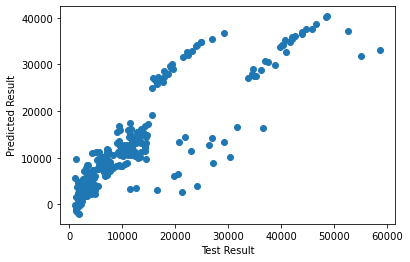

In [232]:
plt.scatter(y1_test, y1_pred)
plt.xlabel("Test Result")
plt.ylabel("Predicted Result")
plt.show()

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [36]:
you = [[20,1,29,0,0,3]]
y_pred = lr.predict(you)
y_pred

array([3102.53080111])

In [31]:
X_test

,age,sex,bmi,children,smoker,region
685,53,1,26.410,2,0,3
1284,61,1,36.300,1,1,0
357,47,1,29.830,3,0,2
714,24,0,22.600,0,0,0
17,23,1,23.845,0,0,3
...,...,...,...,...,...,...
615,47,0,36.630,1,1,1
456,55,0,30.140,2,0,1
412,26,0,17.195,2,1,3
536,33,0,38.900,3,0,0
